## Laboratory Session 02
### Sabrina Giorgetti
### Matricola: 2013375
### Email: sabrina.giorgetti@studenti.unipd.it

In [17]:
# for full width
#IRdisplay::display_html('<style>.container { width:75% !important; }</style>')

library(ggplot2)
library(tidyverse)
library(gridExtra)
library(scales)
library(random)
library(GoFKernel)
library(grid)


## Exercise 1

A set of measurements have been performed on the concentration of a contaminant in tap water.  The following tables reports a set of values (x), with the corresponding probabilities given by the two methods (p1 and p2)


|x|15.58|15.9|16|16.1| 16.2|
|--|---|---|---|---|---|
|p1|0.15|0.21|0.35|0.15|0.14|
|p2|0.14|0.05|0.64|0.08|0.09|

1. Evaluate the expected values, E[X], and the variance, Var(X), for both methods 

The expected value $E[X]$ can be obtained as the weigthed mean between the values and the probabilities, while to calculate the variance $V(x)$ we use the definition $V(x) = E[x - E[x]]^2$

In [2]:
x <- c(15.58,15.9,16,16.1,16.2)
p1 <- c(0.15,0.21,0.35,0.15,0.14)
p2 <- c(0.14,0.05,0.64,0.08,0.09)

mean_p1 <- sum(x*p1)  #also weighted.mean()
mean_p2 <- sum(x*p2)

var_p1 <- sum((x-mean_p1)^2 * p1)
var_p2 <- sum((x-mean_p2)^2 * p2) 

cat("The expected value for the first method (p1) is E[x]=", mean_p1, "while the variance V(x)=", var_p1 , "\n" )
cat("The expected value for the second method (p2) is E[x]=", mean_p2, "while the variance V(x)=", var_p2)


The expected value for the first method (p1) is E[x]= 15.959 while the variance V(x)= 0.033979 
The expected value for the second method (p2) is E[x]= 15.9622 while the variance V(x)= 0.02816716

## Exercise 2

The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30

A. Simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram

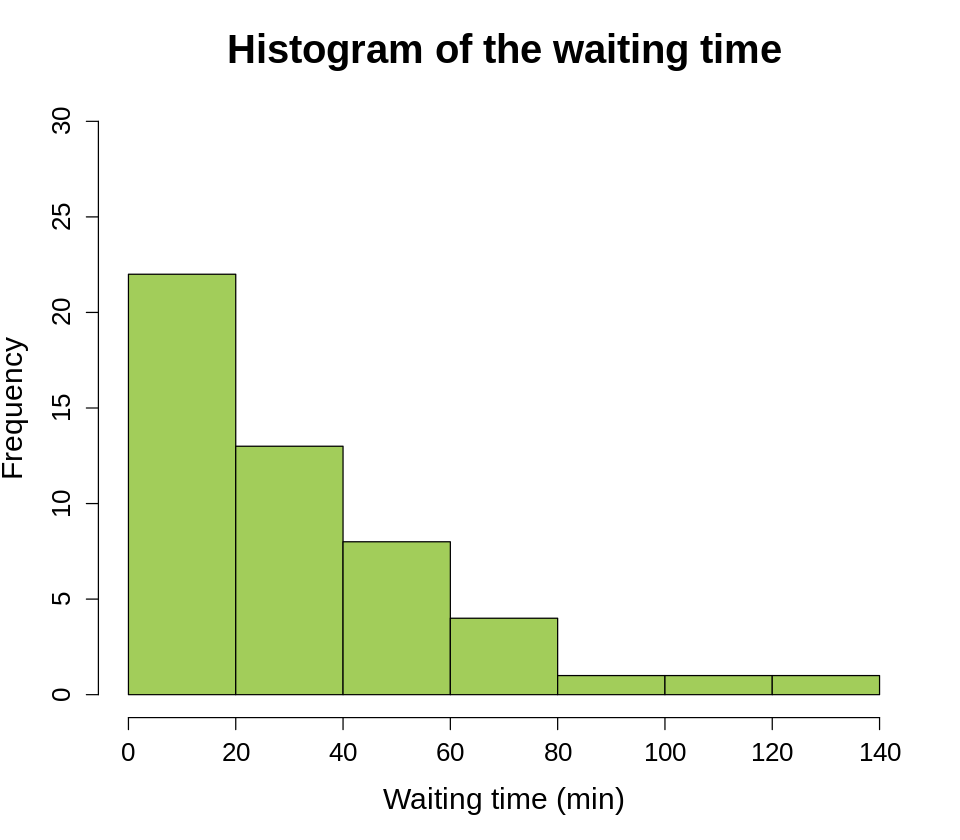

In [3]:
set.seed(1234)
people <- 1:50
lambda <- 1/30
wtime <- rexp(people, lambda) #simulate -> rexp() generate random saple from the exponential distribution 

options(repr.plot.width = 8, repr.plot.height = 7)
hist(wtime,ylim=c(0,30), main= "Histogram of the waiting time", xlab='Waiting time (min)', 
     col="darkolivegreen3", cex.axis = 1.3, cex.lab=1.5, cex.main=2)


B. What is the probability that a person will wait for less than 10 minutes ? <br>

The probability that a person will wait for less than 10 minutes can be obtained theoretically from the CDF evaluatiting $P(T < 10 min)$. If instead we want to take into consideration the simulated data, then the probabity is given by the ratio between the number of the simulated sample, with value less than 10, and the entire number of simulated samples. 

In [4]:
pless10th <- pexp(10, lambda, lower.tail=TRUE) #TRUE P(X < x)
cat("The probability that a person will wait less than 10 minutes, from the theory, is equal to", percent(pless10th), "\n")

pless10sim <- length(wtime[wtime <10]) / length(wtime) 
cat("The probability that a person will wait less than 10 minutes, from the simulated data, is equal to", percent(pless10sim), "\n")


The probability that a person will wait less than 10 minutes, from the theory, is equal to 28% 
The probability that a person will wait less than 10 minutes, from the simulated data, is equal to 32% 


C. Evaluate  the  average  waiting  time  from  the  simulated  data  and  compare  it  with the  expected  value  (calculated  from  theory  and  by  manipulating  the  probability distributions using R) <br>

For the simulated data the average waiting time can be calculated as the mean of the simulated data, for the theory the average waiting time is equal to 1/lambda, as the results of the integration $\int_0^{\infty} x \lambda e^{- \lambda x}$ 

In [5]:
cat("The average waiting time from the simulated data is", mean(wtime), "minutes \n")

toint <- function (x){x*dexp(x,lambda)}
cat("The average waiting time from theory is", integrate(toint, 0, Inf)$value, "minutes"  ) 


The average waiting time from the simulated data is 29.67523 minutes 
The average waiting time from theory is 30 minutes

D. What is the probability for waiting more than one hour before being received ? <br>
The probability for waiting more than one hour before being received can be obtained with the CDF,  P(T > 60 min). To have bigger than 60 min in R we can still use the function pexp() setting lower.tail=FALSE.

In [6]:
pmore60 <- pexp(60, lambda, lower.tail=FALSE) #FALSE P(X > x)
cat("Probability of waiting more than 1h from theory:", percent(pmore60))

Probability of waiting more than 1h from theory: 14%

## Exercise 3

Let’s suppose that on a book, on average, there is one typo error every three pages. If  the  number  of  errors  follows  a  Poisson  distribution,  plot  the  pdf  and  cdf,  and calculate the probability that there is at least one error on a specific page of the book.

1. Plot the pdf and the cdf

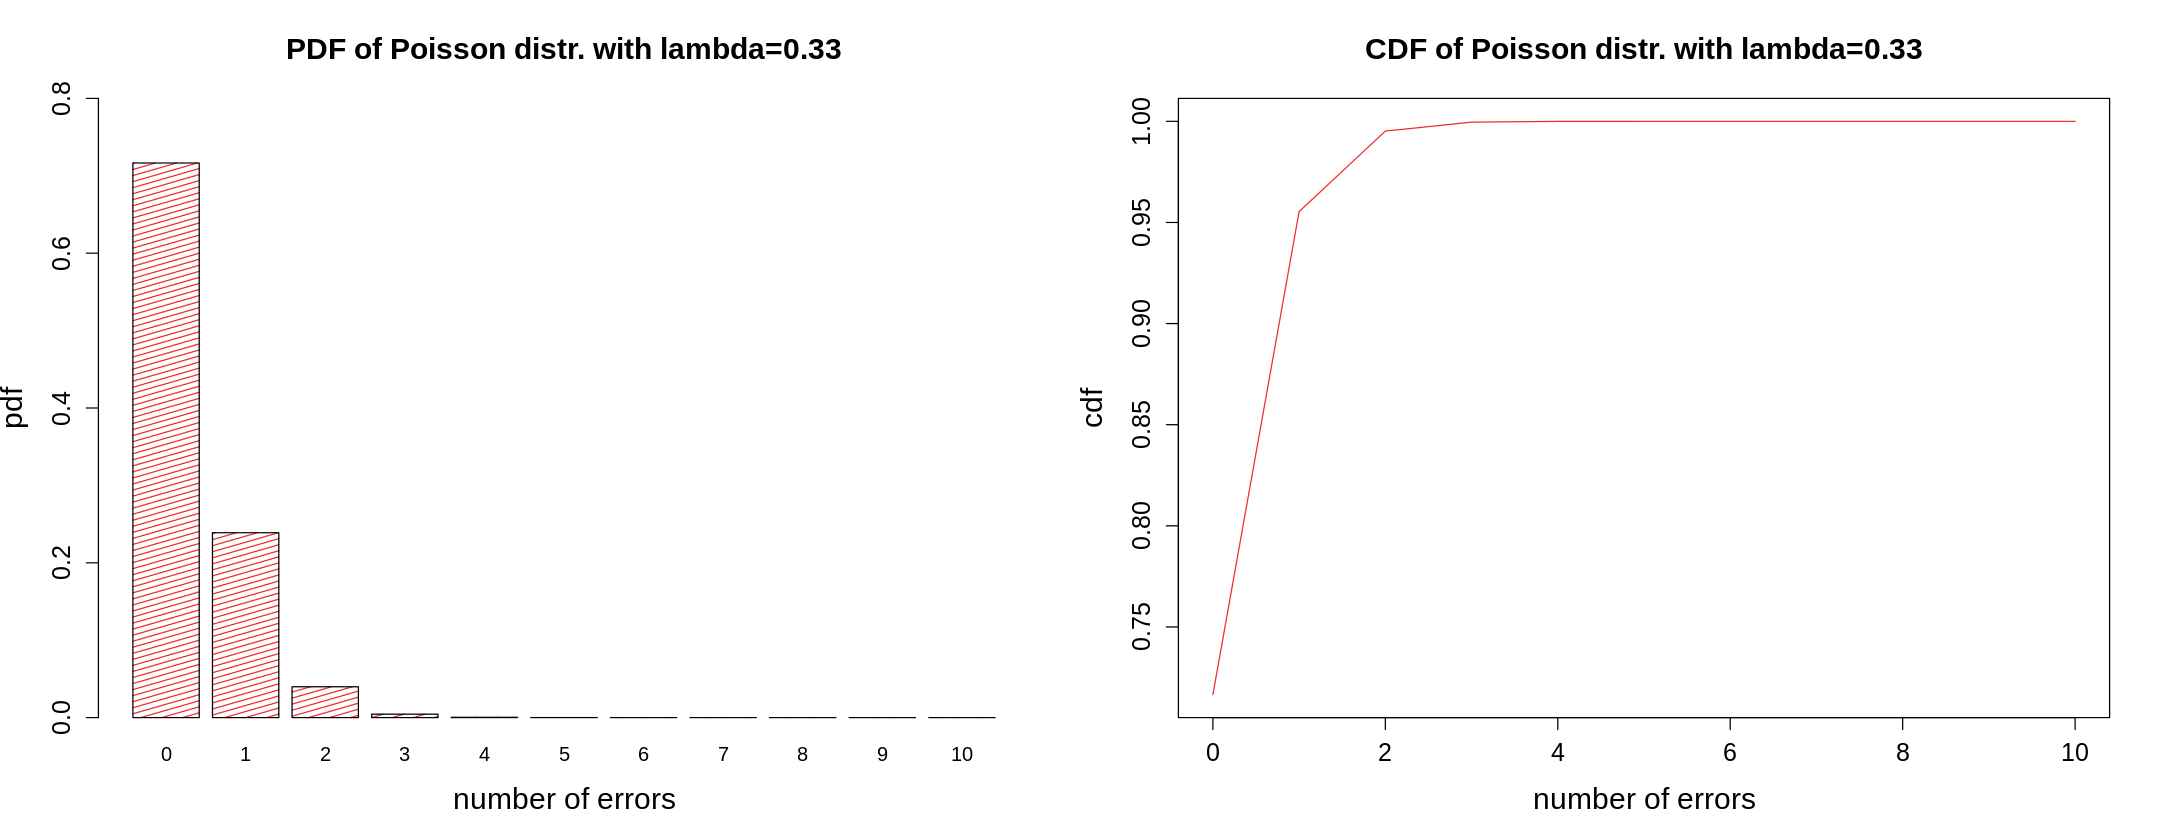

In [7]:
x=0:10 #numero di errori
lambda=1/3

pdf <- dpois(x=x, lambda=lambda)  

cdf <- ppois(x, lambda=1/3) #less than x errors


options(repr.plot.width = 18, repr.plot.height = 7)
par(mfrow = c(1, 2))

pdf_plot <- barplot(pdf,names=x,col="firebrick2",xlab="number of errors",ylab="pdf",density=30, main = sprintf("PDF of Poisson distr. with lambda=%.2f",lambda)
       ,ylim=c(0,0.8),cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5)

cdf_plot <- plot(x ,cdf, type="l", col="firebrick2", xlab="number of errors",ylab="cdf",  main = sprintf("CDF of Poisson distr. with lambda=%.2f",lambda)
                   ,cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5)


2. Calculate the probability that there is at least one error on a specific page of the book.

In [8]:
#calculate the probability that there is at least one error on a specific page of the book
#first method: 1 - prob of not having errors
perr <- 1 - dpois(0, lambda)

#second method
perr2 <- ppois(0, lambda, lower.tail=FALSE)  #cdf P X > x n
cat("The probability that there is at least one error on a specific page of the book is equal to", percent(perr2)) #sum bar values 

The probability that there is at least one error on a specific page of the book is equal to 28%

## Exercise 4

We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.

The probability, that at least 10 draws are needed to extract an ace, can be calculated through the geometric distribution. The geometric distribution function dgeom() in R is defined as: 

$$p(x)=p(1-p)^x$$

where x is the number of failures before success occurs. Using the R function pgeom() to calculate the distribution function we have: 

$$pgeom(8, prob, lower.tail=FALSE)$$

where $prob=\frac{4}{52}=\frac{1}{13} $ is the probability to extract an ace; setting then lower.tail=FALSE means we are in the case of P(X > x), so x=8 as it means that we have at least 9 insucess before succes occurs.

In [9]:
#?pgeom()  
#lower.tail probabilities are 𝑃[𝑋≤𝑥], otherwise, 𝑃[𝑋>𝑥].

In [10]:
cards <- 52
ace <- 4
fails <- 9
prob <- ace/cards #probability of extacting an ace
p10 <- pgeom(8, prob, lower.tail=FALSE) 

cat("The probability that at least 10 draws are needed is", percent(p10))

The probability that at least 10 draws are needed is 49%

## Exercise 5

The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form:
 
$$f(X) = \begin{cases} c(t−1)(2−t) \; \;  1<t<2  \\ 0 \;\;\;\;   otherwise \end{cases} $$

where t is the time in hours.

A. Using the integrate() R function, determine the constant c (and verify it analytically) <br>

Analitically we have to calculate: $$ c \int_1^2 (t-1)(2-t)=1  \rightarrow c \frac{1}{6}=1 \rightarrow c=6$$

In [11]:
fx <- function(t) {(t-1)*(2-t)} #time in hours  
int <-integrate(fx,1,2)
c <- 1/int$value
cat("The value of the constant c is", c)

The value of the constant c is 6

B. Write the set of four R functions and plot the pdf and cdf, respectively

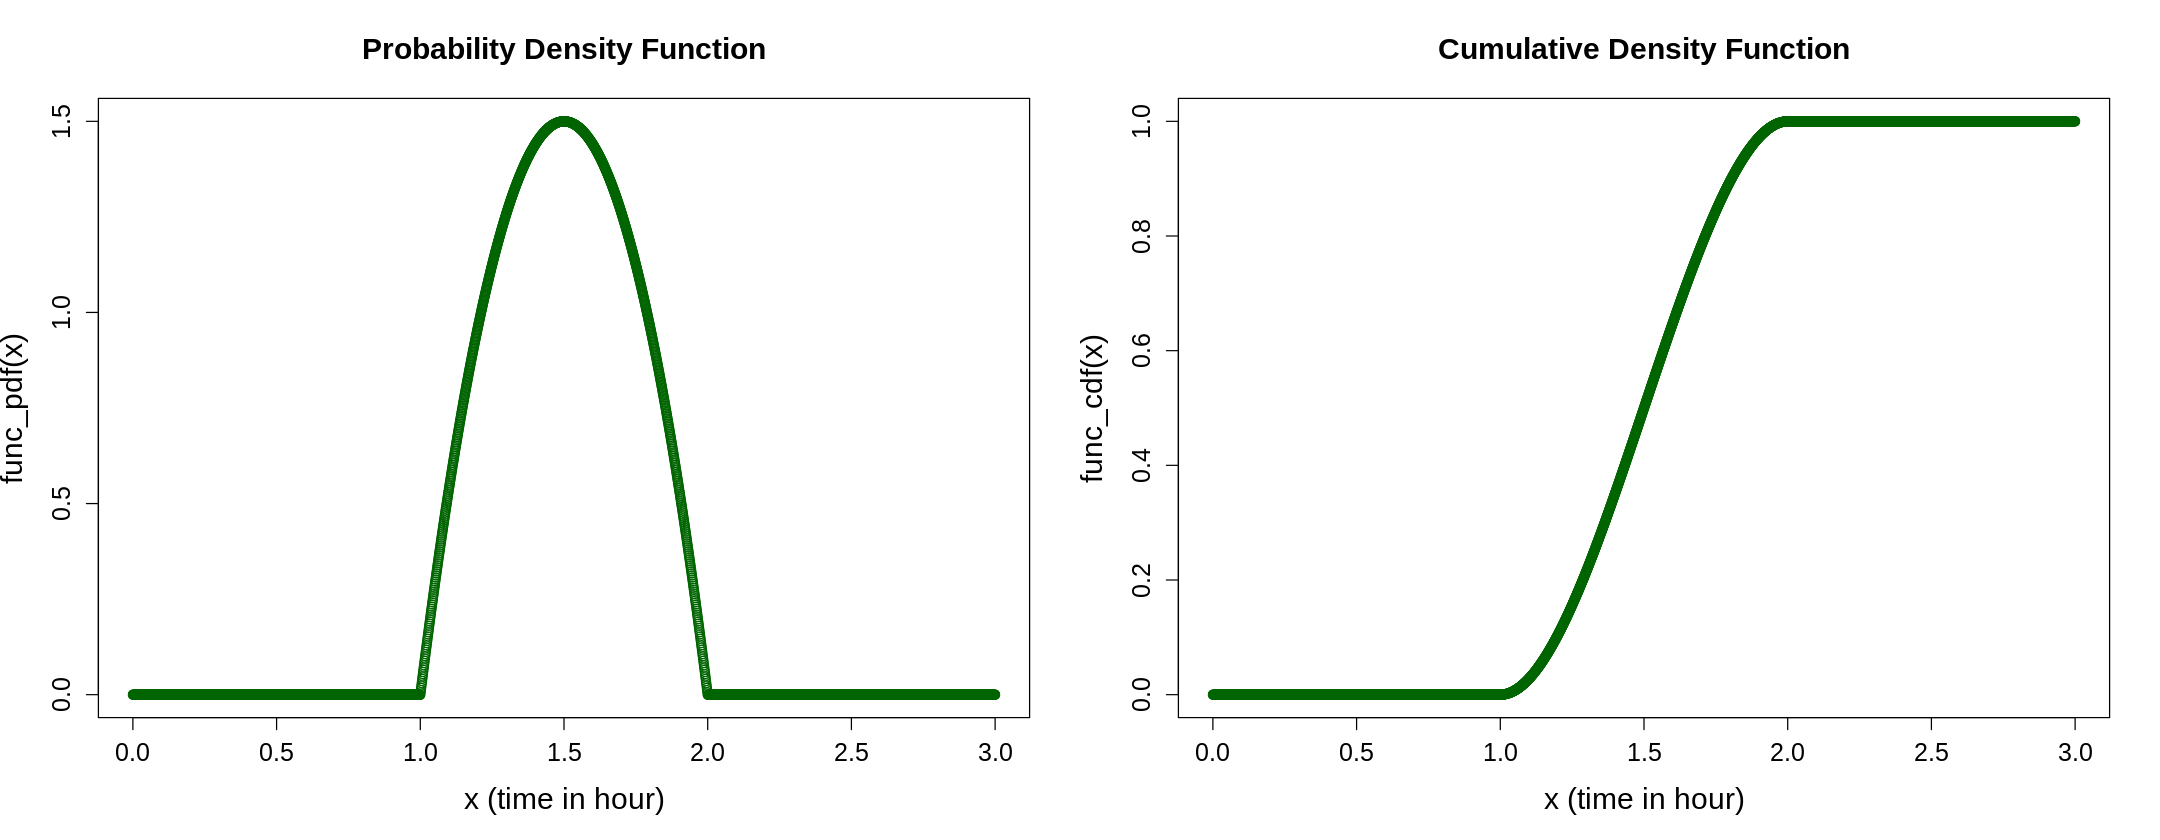

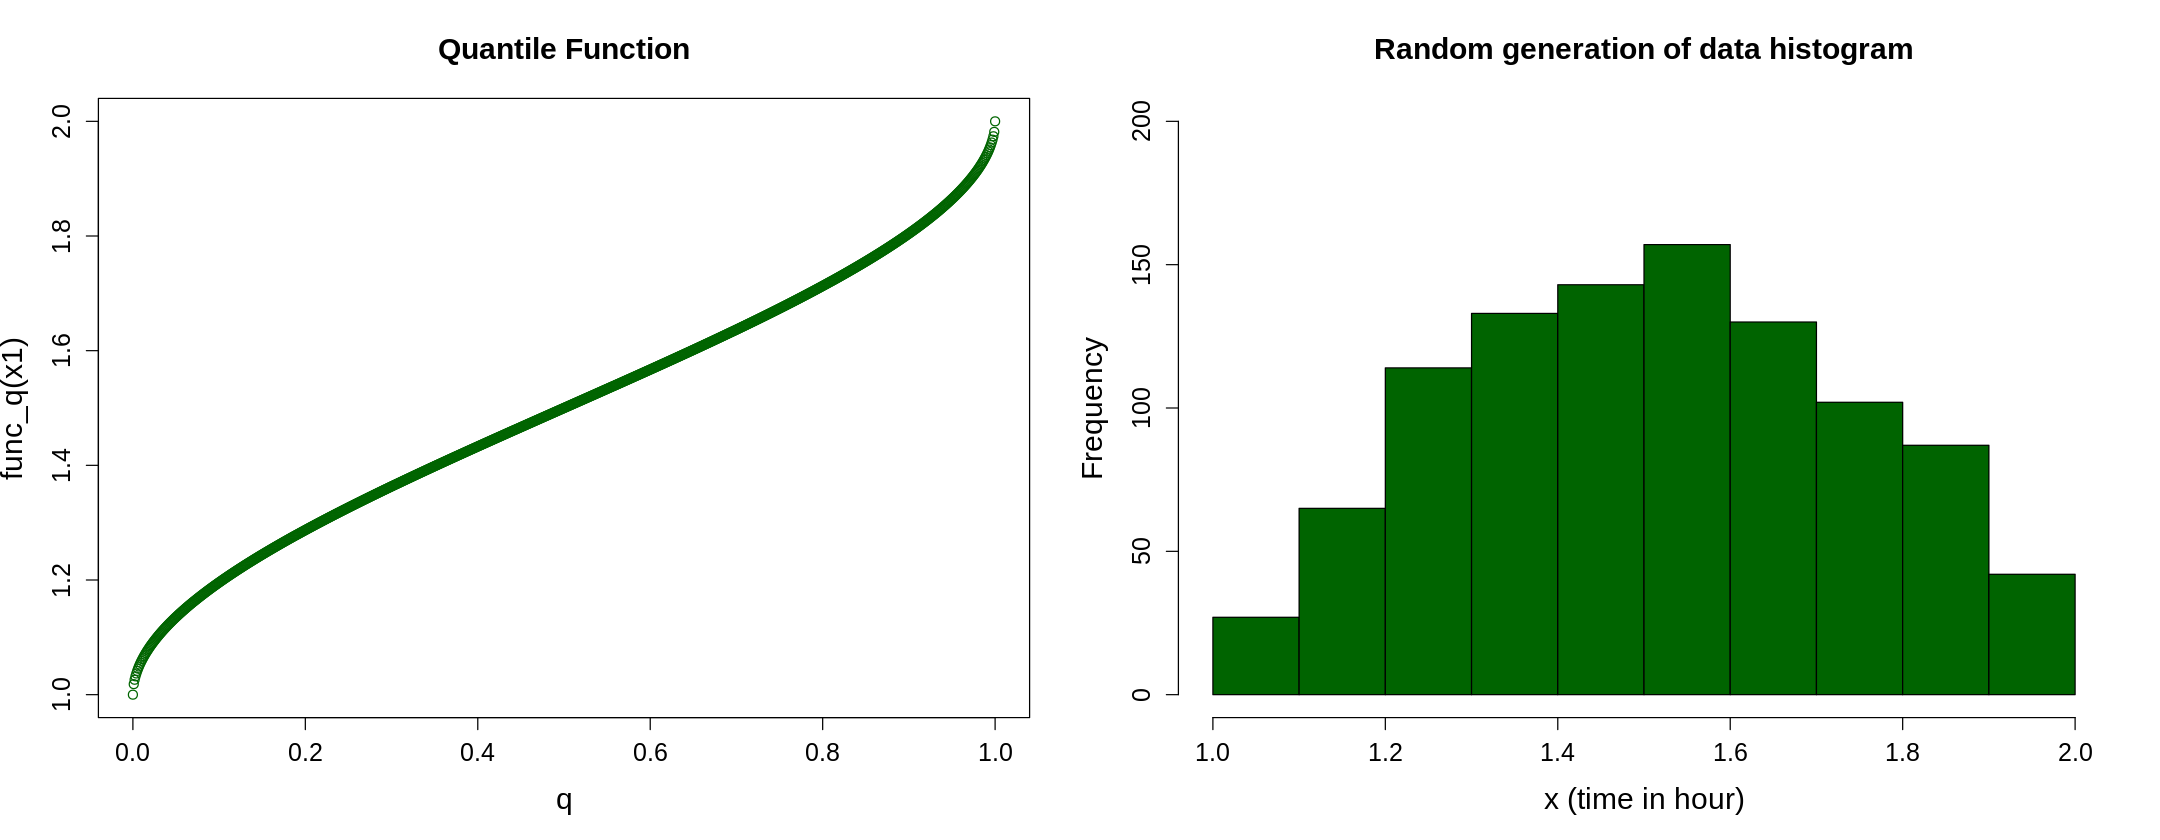

In [12]:
#pdf 
func_pdf <- function(x){
    val<-ifelse(x>1 & x < 2, 6*(x-1)*(2-x), 0)
    return(val)
}


#cdf: analitically calculated
func_cdf <- function(x){
    val<-ifelse(x>1 & x<2, -2*x^3+9*x^2-12*x+5,ifelse(x>=2, 1,0))
    return(val)
}

#second way, using integrate() function  -> we obtain the sample plot (we plot only the first one) 
func_cdf_52 <- function(x){
    valc <- c(length(x))
    for (i in 1:length(x)){
        int <- integrate(func_pdf,1,x[i])
        valc[i] <-ifelse(x[i]>1, int, 0)
        }
    return(valc)
}

#quantile returning function
func_q <- function(x){ 
     q <- sapply(x,inverse(func_cdf,1,2))
    return(q)
    }


#random genaration: generate a vector with random values from a uniform distribution
func_r <- function(x){
    func_q(runif(x))    
}


#plot
options(repr.plot.width = 18, repr.plot.height = 7)
par(mfrow = c(1, 2))

x <- seq(0,3,0.001)
plot(x,func_pdf(x), col="darkgreen",xlab="x (time in hour)", main = "Probability Density Function"
       ,cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5)


plot(x,func_cdf(x), col="darkgreen",xlab="x (time in hour)" ,main = "Cumulative Density Function"
       ,cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5)

x1 <- seq(0,1,0.001)
plot(x1,func_q(x1), col="darkgreen",xlab="q" ,main = "Quantile Function"
       ,cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5)

hist(func_r(1000), col="darkgreen",xlab="x (time in hour)" ,main = "Random generation of data histogram",
       ylim=c(0,200),cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5)


 C. Evaluate the probability that the student will finish the aptitude test in more than 75 minutes.  And that it will take between 90 and 120 minutes.

In [13]:
pmore75 <- 1- func_cdf(1.25) #75 minutes is equal to 1.25 as x in the time in hours
cat("The probability that the student will finish the aptitude test in more than 75 minutes is", percent(pmore75), "\n")

pmore90 <- 1- func_cdf(1.5) #90 minutes is equal to 1-5 as x is the time in hours
cat("The probability that the student will finish the aptitude test in between 90 and 120 minutes is", percent(pmore90), "\n")


The probability that the student will finish the aptitude test in more than 75 minutes is 84% 
The probability that the student will finish the aptitude test in between 90 and 120 minutes is 50% 


## Exercise 6

The lifetime of tires sold by an used tires shop is 10^4·x km, where x is a random variable following the distribution funcion

$$f(X)= \begin{cases}2/x^2 \; 1< x <2 \\ 0 \;\;\;\; otherwise \end{cases}$$

A. Write the set of four R functions and plot the pdf and cdf, respectively

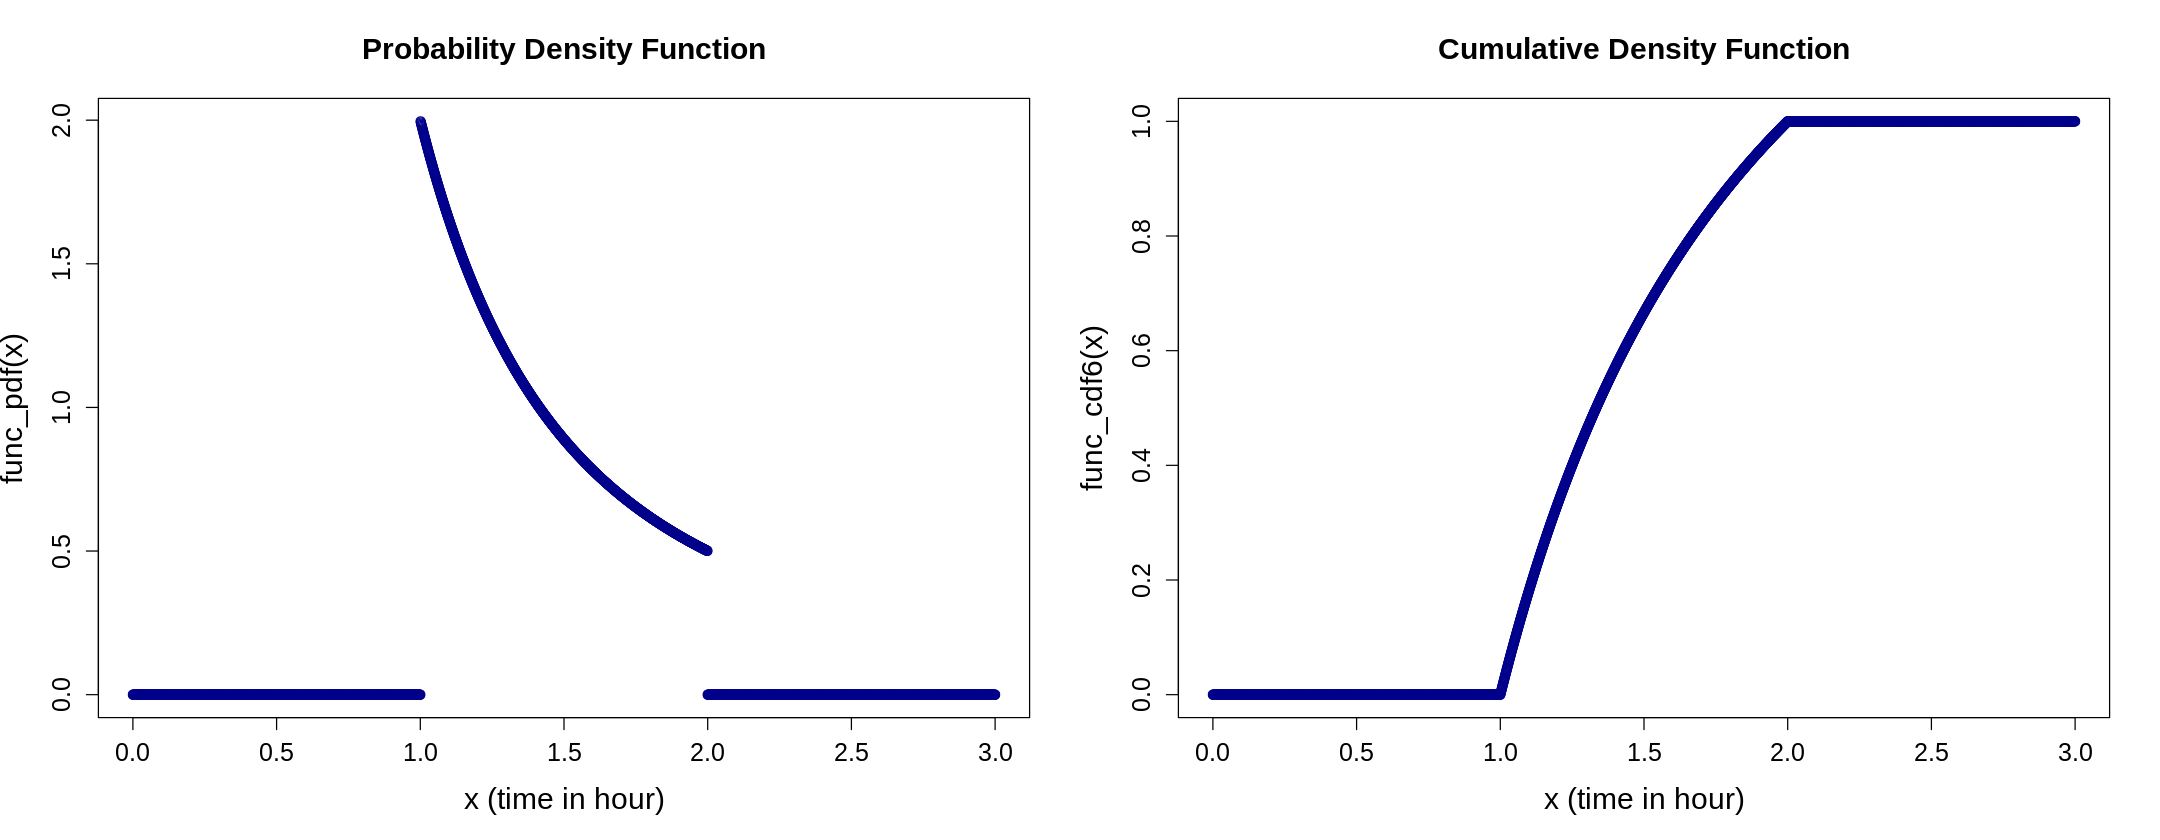

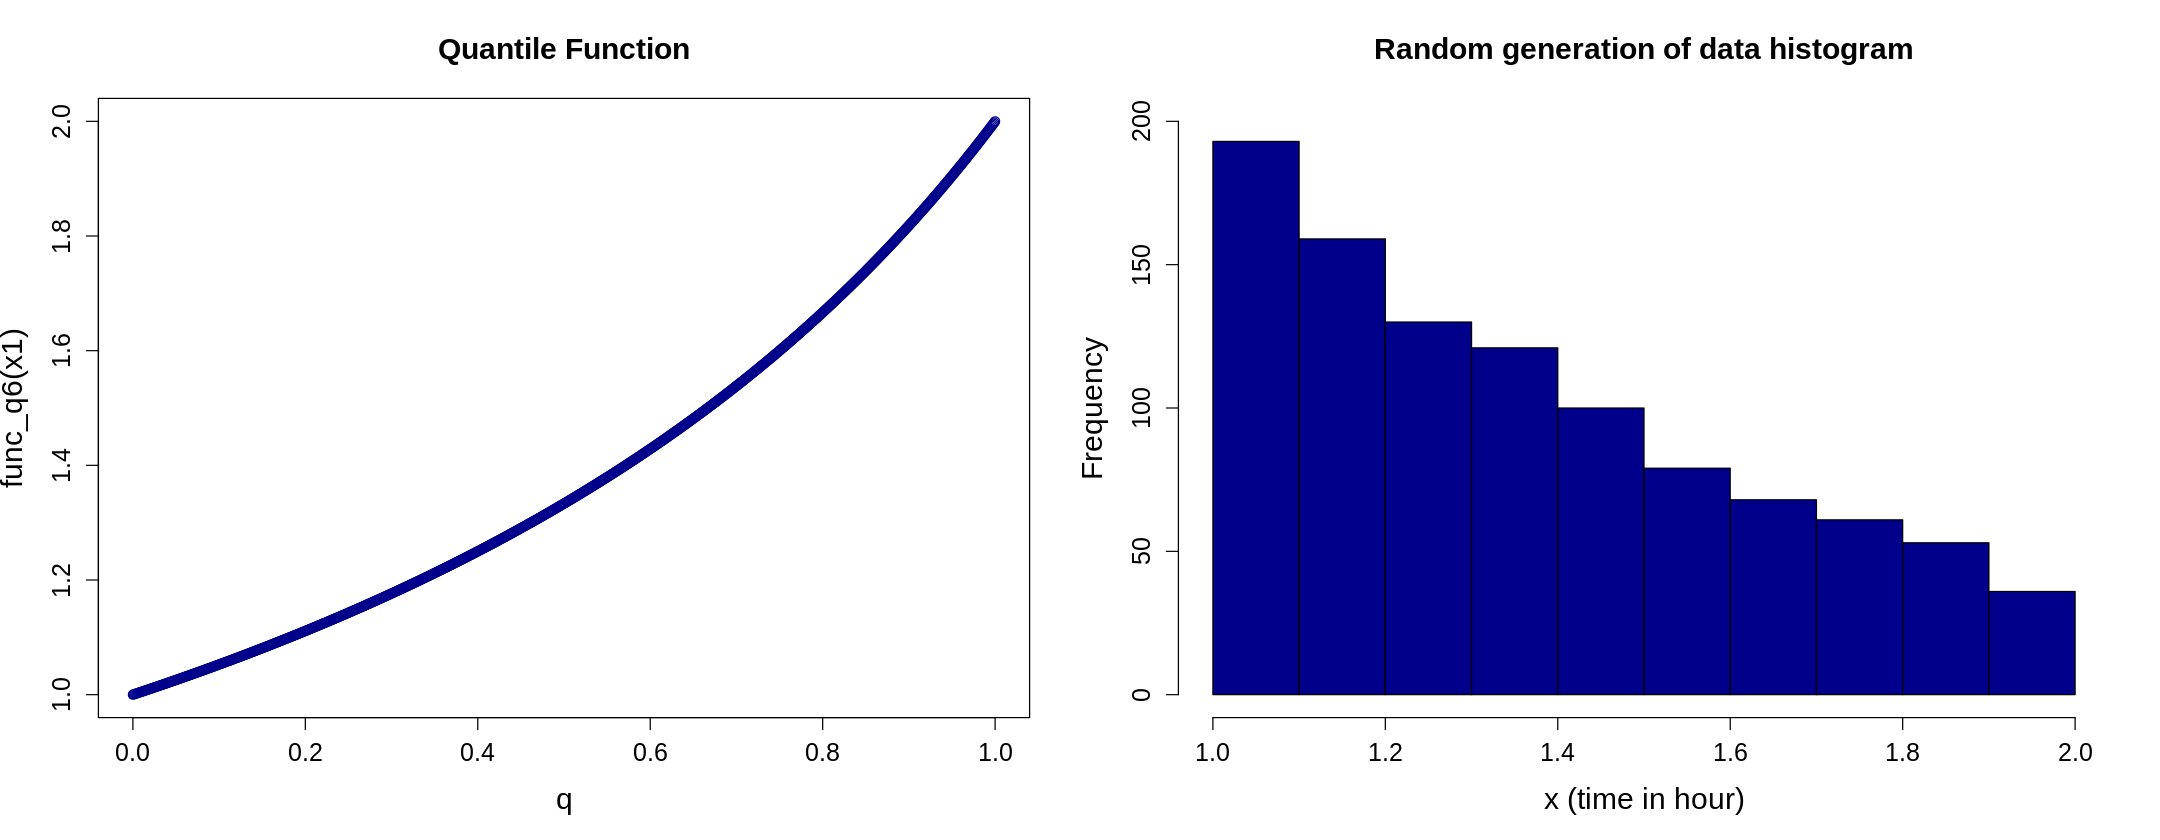

In [14]:
#pdf
func_pdf <- function(x){
    val<-ifelse(1 < x & x < 2, 2/x^2, 0)
    return(val)
}


##cdf: analitically calculated
func_cdf6 <- function(x){
    val<-ifelse(x>1 & x < 2, 2-2/x, ifelse(x>=2,1,0))
    return(val)
}


#second way, using integrate() function  -> we obtain the sample plot (we plot only the first one) 
func_cdf_62 <- function(x){
    valc <- c(length(x))
    for (i in 1:length(x)){
        int <- integrate(func_pdf,1,x[i])
        valc[i] <-ifelse(x[i]>1, int, 0)
        }
    return(valc)
}


#quantile returning function
func_q6 <- function(x){ 
     q <- sapply(x,inverse(func_cdf6,1,2))
    return(q)
    }


#random genaration: generate a vector with random values from a uniform distribution
func_r6 <- function(x){
    r <- func_q6(runif(x))    
    return(r)
}


#plot
options(repr.plot.width = 18, repr.plot.height = 7)
par(mfrow = c(1, 2))

x <- seq(0,3,0.001)

plot(x,func_pdf(x), col="darkblue",xlab="x (time in hour)", main = "Probability Density Function"
       ,cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5)


plot(x,func_cdf6(x), col="darkblue",xlab="x (time in hour)" ,main = "Cumulative Density Function"
       ,cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5)

x1 <- seq(0,1,0.001)
plot(x1,func_q6(x1), col="darkblue",xlab="q" ,main = "Quantile Function"
       ,cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5)

hist(func_r6(1000), col="darkblue",xlab="x (time in hour)" ,main = "Random generation of data histogram",
       ylim=c(0,200),cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5)


B. Determine the probability that tires will last less than 15000 km

In [15]:
#The lifetime of tires sold by an used tires shop is 10^4·x km, where x is a random variable follow

pless15 <- func_cdf6(1.5)
cat("The probability that tires will last less than 15000km is equal to", percent(pless15))

The probability that tires will last less than 15000km is equal to 67%

C. Sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression Var(X) =E[X^2]−E[X]^2

In [16]:
sample <- func_r6(3000)

mean_val <- mean(sample)*10^4
var_val <- (mean((sample*10^4)^2)-mean_val^2)

cat("The mean value is equal to", mean_val, "km \n")
cat("The variance is equal to", var_val, "km^2")

The mean value is equal to 13915.72 km 
The variance is equal to 7970838 km^2